In [2]:
# Import Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
from mlxtend.frequent_patterns import association_rules
from collections import Counter
from IPython.display import Image

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
pip install requests

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
import requests
from io import StringIO
# Google Drive file ID from the link
file_id = '1apopGzFq1OD4RwUUFxGSSgCOXjno_TsM'

# Google Drive download link
url = f"https://drive.google.com/uc?id={file_id}"

# Make a GET request to the URL
response = requests.get(url)

# Read the content of the response into a pandas DataFrame
grocery_data = StringIO(response.text)
df = pd.read_csv(grocery_data)

# Read file
print(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


       Member_number        Date        itemDescription
0               1808  21-07-2015         tropical fruit
1               2552  05-01-2015             whole milk
2               2300  19-09-2015              pip fruit
3               1187  12-12-2015       other vegetables
4               3037  01-02-2015             whole milk
...              ...         ...                    ...
38760           4471  08-10-2014          sliced cheese
38761           2022  23-02-2014                  candy
38762           1097  16-04-2014               cake bar
38763           1510  03-12-2014  fruit/vegetable juice
38764           1521  26-12-2014               cat food

[38765 rows x 3 columns]


In [5]:
# Check data
df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(38765, 3)

In [6]:
# Get the first 5 row
df.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


# Data Exploration

In [7]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# Check number of unique value
df.Member_number.nunique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3898

In [9]:
# Check number of unique value
df.Date.nunique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


728

In [10]:
# Check number of unique value
df.itemDescription.nunique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


167

In [11]:
# Check number of null value
df.isnull().sum().sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Member_number      0
Date               0
itemDescription    0
dtype: int64

In [12]:
# Get the most 10 bought item
df["itemDescription"].value_counts().head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


itemDescription
whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: count, dtype: int64

# ELCAT

In [13]:
# Combine 'Member_number' and 'Date' into a single column 'Member_number-Date'
df['Member_number-Date'] = df['Member_number'].astype(str) + '-' + df['Date'].astype(str)

# Group by the new column and aggregate the 'itemDescription' column
grocery_data = df.groupby('Member_number-Date')['itemDescription'].apply(lambda x: ','.join(x)).reset_index()

# Display the grocery_data
print(grocery_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


      Member_number-Date                                    itemDescription
0        1000-15-03-2015      sausage,whole milk,semi-finished bread,yogurt
1        1000-24-06-2014                      whole milk,pastry,salty snack
2        1000-24-07-2015                        canned beer,misc. beverages
3        1000-25-11-2015                           sausage,hygiene articles
4        1000-27-05-2015                            soda,pickled vegetables
...                  ...                                                ...
14958    4999-24-01-2015  tropical fruit,berries,other vegetables,yogurt...
14959    4999-26-12-2015                                bottled water,herbs
14960    5000-09-03-2014                       fruit/vegetable juice,onions
14961    5000-10-02-2015           soda,root vegetables,semi-finished bread
14962    5000-16-11-2014                      bottled beer,other vegetables

[14963 rows x 2 columns]


In [14]:
# Group by the new column and aggregate the 'itemDescription' column
grocery_data = df.groupby('itemDescription')['Member_number-Date'].apply(lambda x: ','.join(x)).reset_index()

# Display the grocery_data
print(grocery_data)


           itemDescription                                 Member_number-Date
0    Instant food products  1746-15-02-2015,4962-29-03-2015,4160-12-08-201...
1                 UHT-milk  2836-29-12-2015,2371-30-08-2015,1016-05-10-201...
2         abrasive cleaner  2421-21-11-2015,3390-21-02-2015,2730-15-06-201...
3         artif. sweetener  1273-04-05-2015,1885-03-07-2015,2618-03-12-201...
4           baby cosmetics    2070-19-12-2015,4759-20-02-2015,1552-09-01-2014
..                     ...                                                ...
162            white bread  3950-01-10-2015,3959-12-04-2015,4796-25-08-201...
163             white wine  4389-13-04-2015,2723-07-05-2015,2464-13-05-201...
164             whole milk  2552-05-01-2015,3037-01-02-2015,2762-20-03-201...
165                 yogurt  4056-12-06-2015,4918-27-01-2015,1723-02-09-201...
166               zwieback  1968-10-01-2015,2272-05-09-2015,4591-13-06-201...

[167 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
class Item:
    def __init__(self, name):
        self.name = name

class Transaction:
    def __init__(self, transaction_id, items):
        self.transaction_id = transaction_id
        self.items = items

class VerticalDatabase:
    def __init__(self, transactions):
        self.items = {}
        self.build_vertical_database(transactions)

    def build_vertical_database(self, transactions):
        for transaction in transactions:
            for item in transaction.items:
                if item.name not in self.items:
                    self.items[item.name] = set()
                self.items[item.name].add(transaction.transaction_id)

class EclatNode:
    def __init__(self, item_name, transaction_ids, support):
        self.item_name = item_name
        self.transaction_ids = transaction_ids
        self.support = support
        self.children = []

class Eclat:
    def __init__(self, min_support):
        self.min_support = min_support

    def run(self, vertical_db):
        frequent_itemsets = []
        for item_name, transaction_ids in vertical_db.items.items():
            support = len(transaction_ids)
            if support >= self.min_support:
                frequent_itemsets.append(EclatNode(item_name, transaction_ids, support))
        self.depth_first_search(frequent_itemsets, vertical_db)
        return frequent_itemsets

    def depth_first_search(self, itemsets, vertical_db):
        for i in range(len(itemsets)):
            for j in range(i + 1, len(itemsets)):
                intersection = itemsets[i].transaction_ids & itemsets[j].transaction_ids
                support = len(intersection)
                if support >= self.min_support:
                    new_itemset = EclatNode(
                        itemsets[i].item_name + "," + itemsets[j].item_name,
                        intersection,
                        support
                    )
                    itemsets[i].children.append(new_itemset)
                    self.depth_first_search([new_itemset], vertical_db)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# Step 1: Parse the DataFrame and create Item and Transaction objects
transactions = []
for _, row in grocery_data.iterrows():
    item_description = row["itemDescription"]
    member_dates = row["Member_number-Date"].split(',')

    for member_date in member_dates:
        member_number, date = member_date.split('-')[0], member_date.split('-')[1:]
        transaction_id = int(member_number)  # Using member number as transaction ID
        item = Item(item_description)

        # Check if transaction with this ID already exists
        transaction = next((t for t in transactions if t.transaction_id == transaction_id), None)
        if transaction is None:
            transaction = Transaction(transaction_id, [item])
            transactions.append(transaction)
        else:
            transaction.items.append(item)

# Step 2: Build the Vertical Database
vertical_db = VerticalDatabase(transactions)

# Step 3: Run the Eclat Algorithm
total_transactions = len(transactions)
min_support_percentage = 0.03 # 3%
min_support = int(total_transactions * min_support_percentage)
eclat = Eclat(min_support)
frequent_itemsets = eclat.run(vertical_db)

# Step 4: Retrieve and Process Results
def extract_frequent_itemsets(itemsets, itemset_list=None, support_list=None):
    if itemset_list is None:
        itemset_list = []
        support_list = []

    for itemset in itemsets:
        itemset_list.append(itemset.item_name)
        support_list.append(itemset.support)
        extract_frequent_itemsets(itemset.children, itemset_list, support_list)

    return itemset_list, support_list

itemsets, supports = extract_frequent_itemsets(frequent_itemsets)

# Create a DataFrame from the extracted data
data = {"Itemset": itemsets, "Support": supports}
df = pd.DataFrame(data)

print("Frequent Itemsets (DataFrame):")
print(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Frequent Itemsets (DataFrame):
                       Itemset  Support
0                     UHT-milk      306
1          UHT-milk,whole milk      158
2          UHT-milk,rolls/buns      121
3    UHT-milk,other vegetables      152
4                bottled water      833
..                         ...      ...
327         pickled vegetables      130
328                 pot plants      116
329             red/blush wine      155
330                      pasta      118
331                  detergent      127

[332 rows x 2 columns]


In [17]:
# Count the number of items in each itemset
df['Itemset Count'] = df['Itemset'].str.count(',') + 1
print("DataFrame with Itemset Counts:")
print(df)

DataFrame with Itemset Counts:
                       Itemset  Support  Itemset Count
0                     UHT-milk      306              1
1          UHT-milk,whole milk      158              2
2          UHT-milk,rolls/buns      121              2
3    UHT-milk,other vegetables      152              2
4                bottled water      833              1
..                         ...      ...            ...
327         pickled vegetables      130              1
328                 pot plants      116              1
329             red/blush wine      155              1
330                      pasta      118              1
331                  detergent      127              1

[332 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## 1 Item

In [18]:
# Get Itemset have 1 item only
df_one = df[df['Itemset Count'] == 1]
df_one = df_one.drop_duplicates(subset=['Itemset'])
print("DataFrame without Duplicate Itemsets:")
print(df_one)

DataFrame without Duplicate Itemsets:
                Itemset  Support  Itemset Count
0              UHT-milk      306              1
4         bottled water      833              1
26        cream cheese       345              1
31            margarine      456              1
38            pip fruit      665              1
..                  ...      ...            ...
327  pickled vegetables      130              1
328          pot plants      116              1
329      red/blush wine      155              1
330               pasta      118              1
331           detergent      127              1

[73 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


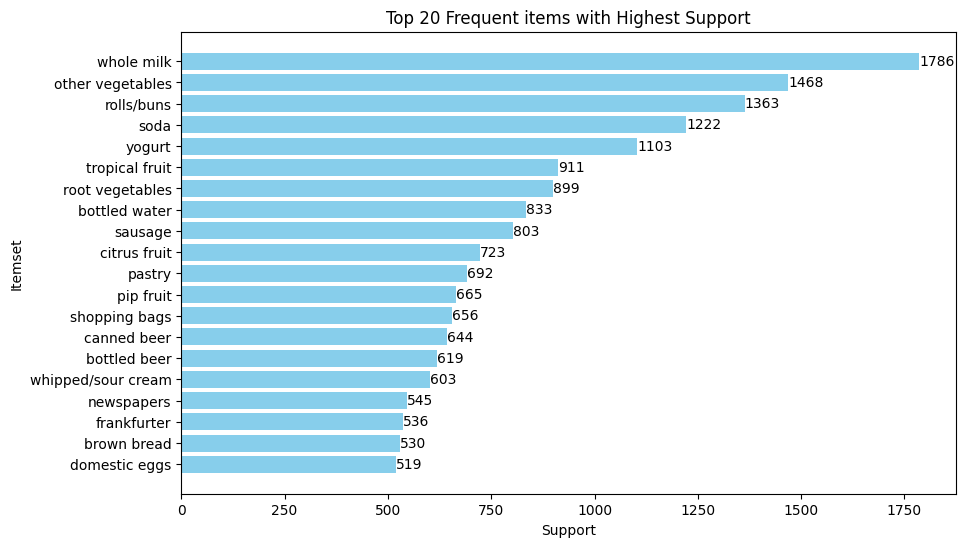

In [19]:
# Sort support
df_sorted = df_one.sort_values(by='Support', ascending=False)

# Take only the top 20 itemsets
top_20_df = df_sorted.head(20)

# Plotting the bar chart for top 20 itemsets with data labels
plt.figure(figsize=(10, 6))
bars = plt.barh(top_20_df['Itemset'], top_20_df['Support'], color='skyblue')
plt.xlabel('Support')
plt.ylabel('Itemset')
plt.title('Top 20 Frequent items with Highest Support')

# Add data labels to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, str(int(bar.get_width())), va='center')

plt.gca().invert_yaxis()  # Invert y-axis to display items with the highest support at the top
plt.show()


## 2 Items

In [20]:
# Get Itemset have 2 items only
df_two = df[df['Itemset Count'] == 2]
df_two = df_two.drop_duplicates(subset=['Itemset'])
print("DataFrame without Duplicate Itemsets:")
print(df_two)

DataFrame without Duplicate Itemsets:
                           Itemset  Support  Itemset Count
1              UHT-milk,whole milk      158              2
2              UHT-milk,rolls/buns      121              2
3        UHT-milk,other vegetables      152              2
5          bottled water,pip fruit      158              2
6    bottled water,root vegetables      211              2
..                             ...      ...            ...
284      canned beer,shopping bags      131              2
291       newspapers,shopping bags      117              2
297             pastry,brown bread      122              2
298             pastry,frankfurter      117              2
300      brown bread,shopping bags      121              2

[259 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


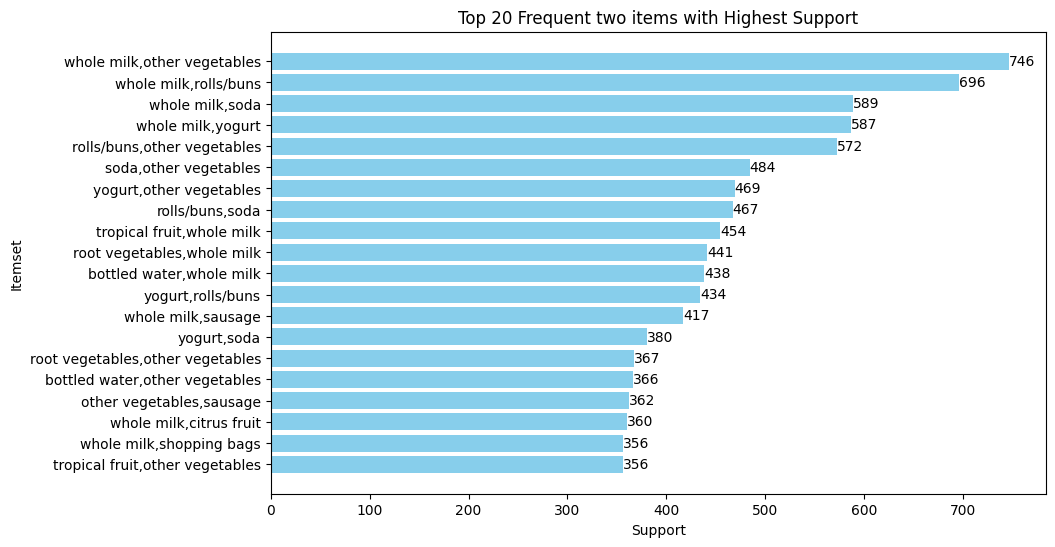

In [21]:
# Sort support
df_sorted = df_two.sort_values(by='Support', ascending=False)

# Take only the top 20 itemsets
top_20_df = df_sorted.head(20)

# Plotting the bar chart for top 20 itemsets with data labels
plt.figure(figsize=(10, 6))
bars = plt.barh(top_20_df['Itemset'], top_20_df['Support'], color='skyblue')
plt.xlabel('Support')
plt.ylabel('Itemset')
plt.title('Top 20 Frequent two items with Highest Support')

# Add data labels to each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, str(int(bar.get_width())), va='center')

plt.gca().invert_yaxis()  # Invert y-axis to display items with the highest support at the top
plt.show()

In [22]:
# Get Itemset have 3 items only
df_three = df[df['Itemset Count'] == 3]
df_three = df_three.drop_duplicates(subset=['Itemset'])
print("DataFrame without Duplicate Itemsets:")
print(df_three)

DataFrame without Duplicate Itemsets:
Empty DataFrame
Columns: [Itemset, Support, Itemset Count]
Index: []


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#Support

In [23]:
# Convert itemsets to frozenset
df_one['itemsets'] = df_one['Itemset'].apply(lambda x: frozenset([x]))
df_two['itemsets'] = df_two['Itemset'].apply(lambda x: frozenset(x.split(',')))
# Convert itemsets to frozenset and calculate support as a decimal
df_one['itemsets'] = df_one['Itemset'].apply(lambda x: frozenset([x]))
df_one['support'] = df_one['Support'] / total_transactions
df_two['itemsets'] = df_two['Itemset'].apply(lambda x: frozenset(x.split(',')))
df_two['support'] = df_two['Support'] / total_transactions
# Create a DataFrame with itemsets and support
itemsets_df = pd.concat([df_one[['itemsets', 'support']], df_two[['itemsets', 'support']]], axis=0)
# Generate association rules
rules = association_rules(itemsets_df, metric="confidence", min_threshold=0.53)
# Sort the rules by confidence in descending order
#rules = rules.sort_values('support', ascending=False)
print("Association Rules:")
print(rules)

Association Rules:
            antecedents   consequents  antecedent support  consequent support  \
0       (cream cheese )  (whole milk)            0.088507            0.458184   
1           (chocolate)  (whole milk)            0.086455            0.458184   
2              (yogurt)  (whole milk)            0.282966            0.458184   
3        (bottled beer)  (whole milk)            0.158799            0.458184   
4   (frozen vegetables)  (whole milk)            0.102617            0.458184   
5         (white bread)  (whole milk)            0.088763            0.458184   
6                (beef)  (whole milk)            0.119548            0.458184   
7       (shopping bags)  (whole milk)            0.168291            0.458184   
8                (meat)  (whole milk)            0.063622            0.458184   
9             (waffles)  (whole milk)            0.069010            0.458184   
10              (sugar)  (whole milk)            0.065931            0.458184   
11       

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
# Sort the rules by support in descending order
rules = rules.sort_values('support', ascending=False)

# Filter the top 5 rules with the highest support
top_5_rules = rules.nlargest(5, 'support')

print("Top 5 Association Rules by Support:")
print(top_5_rules)

Top 5 Association Rules by Support:
           antecedents   consequents  antecedent support  consequent support  \
2             (yogurt)  (whole milk)            0.282966            0.458184   
7      (shopping bags)  (whole milk)            0.168291            0.458184   
3       (bottled beer)  (whole milk)            0.158799            0.458184   
6               (beef)  (whole milk)            0.119548            0.458184   
4  (frozen vegetables)  (whole milk)            0.102617            0.458184   

    support  confidence      lift  leverage  conviction  zhangs_metric  
2  0.150590    0.532185  1.161510  0.020940    1.158185       0.193926  
7  0.091329    0.542683  1.184422  0.014220    1.184772       0.187213  
3  0.085428    0.537964  1.174124  0.012669    1.172672       0.176297  
6  0.064135    0.536481  1.170886  0.009360    1.168919       0.165762  
4  0.055156    0.537500  1.173110  0.008139    1.171495       0.164439  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
# Sort the rules by support in descending order
rules = rules.sort_values('confidence', ascending=False)

# Filter the top 5 rules with the highest support
top_5_rules = rules.nlargest(5, 'confidence')

print("Top 5 Association Rules by confidence:")
print(top_5_rules)

Top 5 Association Rules by confidence:
         antecedents   consequents  antecedent support  consequent support  \
11             (ham)  (whole milk)            0.063366            0.458184   
14  (hamburger meat)  (whole milk)            0.080298            0.458184   
10           (sugar)  (whole milk)            0.065931            0.458184   
1        (chocolate)  (whole milk)            0.086455            0.458184   
9          (waffles)  (whole milk)            0.069010            0.458184   

     support  confidence      lift  leverage  conviction  zhangs_metric  
11  0.036942    0.582996  1.272407  0.007909    1.299307       0.228571  
14  0.045408    0.565495  1.234211  0.008617    1.246974       0.206334  
10  0.036942    0.560311  1.222897  0.006733    1.232273       0.195135  
1   0.047973    0.554896  1.211078  0.008361    1.217281       0.190783  
9   0.037968    0.550186  1.200798  0.006349    1.204534       0.179615  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
# Sort the rules by support in descending order
rules = rules.sort_values('lift', ascending=False)

# Filter the top 5 rules with the highest support
top_5_rules = rules.nlargest(5, 'lift')

print("Top 5 Association Rules by lift:")
print(top_5_rules)

Top 5 Association Rules by lift:
         antecedents   consequents  antecedent support  consequent support  \
11             (ham)  (whole milk)            0.063366            0.458184   
14  (hamburger meat)  (whole milk)            0.080298            0.458184   
10           (sugar)  (whole milk)            0.065931            0.458184   
1        (chocolate)  (whole milk)            0.086455            0.458184   
9          (waffles)  (whole milk)            0.069010            0.458184   

     support  confidence      lift  leverage  conviction  zhangs_metric  
11  0.036942    0.582996  1.272407  0.007909    1.299307       0.228571  
14  0.045408    0.565495  1.234211  0.008617    1.246974       0.206334  
10  0.036942    0.560311  1.222897  0.006733    1.232273       0.195135  
1   0.047973    0.554896  1.211078  0.008361    1.217281       0.190783  
9   0.037968    0.550186  1.200798  0.006349    1.204534       0.179615  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
